In [1]:
%store -r __import

In [2]:
__import

In [86]:
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
sales_train = pd.read_csv('/home/tuts/datasets/how_to_win/sales_train.csv')
item_categories = pd.read_csv('/home/tuts/datasets/how_to_win/item_categories.csv')
items = pd.read_csv('/home/tuts/datasets/how_to_win/items.csv')
shops = pd.read_csv('/home/tuts/datasets/how_to_win/shops.csv')
test = pd.read_csv('/home/tuts/datasets/how_to_win/test.csv')

In [34]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['net'] = sales_train.item_price * sales_train.item_cnt_day
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,net
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [6]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
sales_train['item_id'].nunique()

21807

In [50]:
sales_train['shop_id'].nunique()

60

In [20]:
sales_train['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

In [51]:
sales_train['shop_id'].value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64

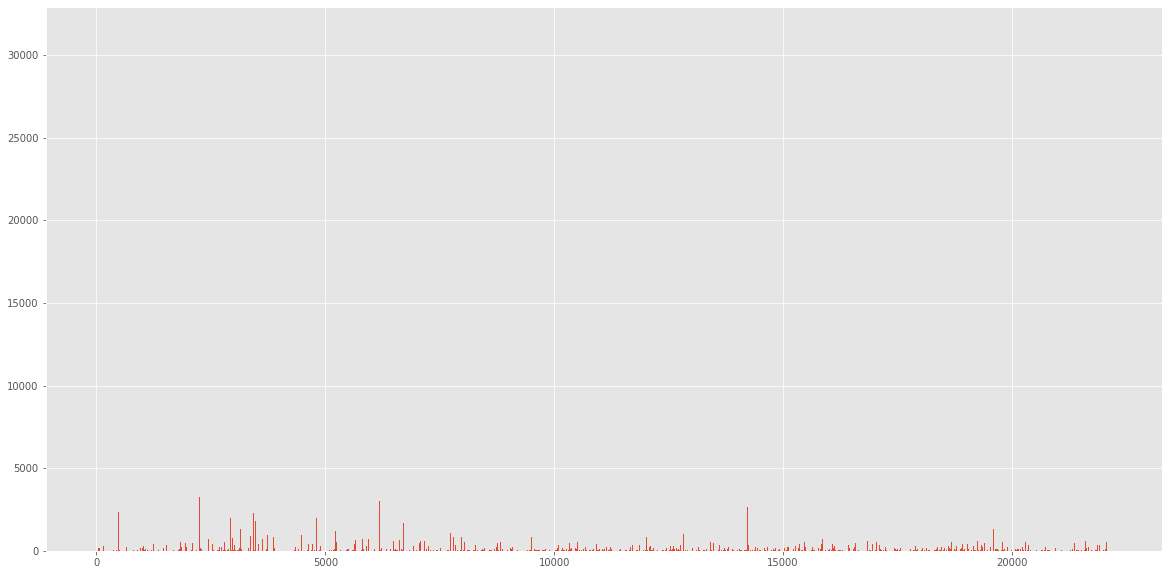

In [24]:
plt.figure(figsize=(20,10))
plt.bar(x=sales_train['item_id'].value_counts().index, height=sales_train['item_id'].value_counts().values);

In [30]:
mean_units = sales_train['item_id'].value_counts().mean()
median_units = sales_train['item_id'].value_counts().median()

In [32]:
print(f'Mean of units sold/returned for items = {mean_units}')
print(f'Median of units sold/returned for items = {median_units}')

Mean of units sold/returned for items = 134.62874306415372
Median of units sold/returned for items = 32.0


In [36]:
item_id_net = sales_train[['item_id', 'net']].groupby('item_id', as_index=False).sum()
item_id_net

,item_id,net
0,0,58.00
1,1,26940.00
2,2,116.00
3,3,158.00
4,4,58.00
...,...,...
21802,22165,118.00
21803,22166,52200.00
21804,22167,393108.75
21805,22168,4793.50


In [39]:
item_id_net.describe()

,item_id,net
count,21807.000000,2.180700e+04
mean,11098.699271,1.558640e+05
std,6397.059362,1.696693e+06
min,0.000000,-2.858900e+04
25%,5551.500000,2.394500e+03
50%,11105.000000,1.276300e+04
75%,16647.500000,5.489823e+04
max,22169.000000,2.193915e+08


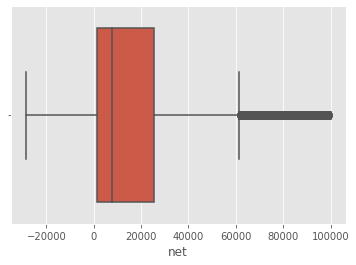

In [49]:
sns.boxplot(x=item_id_net.net[item_id_net.net<10e4]);

In [53]:
shop_id_net = sales_train[['shop_id', 'net']].groupby('shop_id', as_index=False).sum()
shop_id_net

,shop_id,net
0,0,6.637370e+06
1,1,3.238207e+06
2,2,4.404964e+07
3,3,3.014085e+07
4,4,4.053965e+07
5,5,3.816043e+07
6,6,9.806745e+07
7,7,6.695766e+07
8,8,2.349358e+06
9,9,1.637284e+07


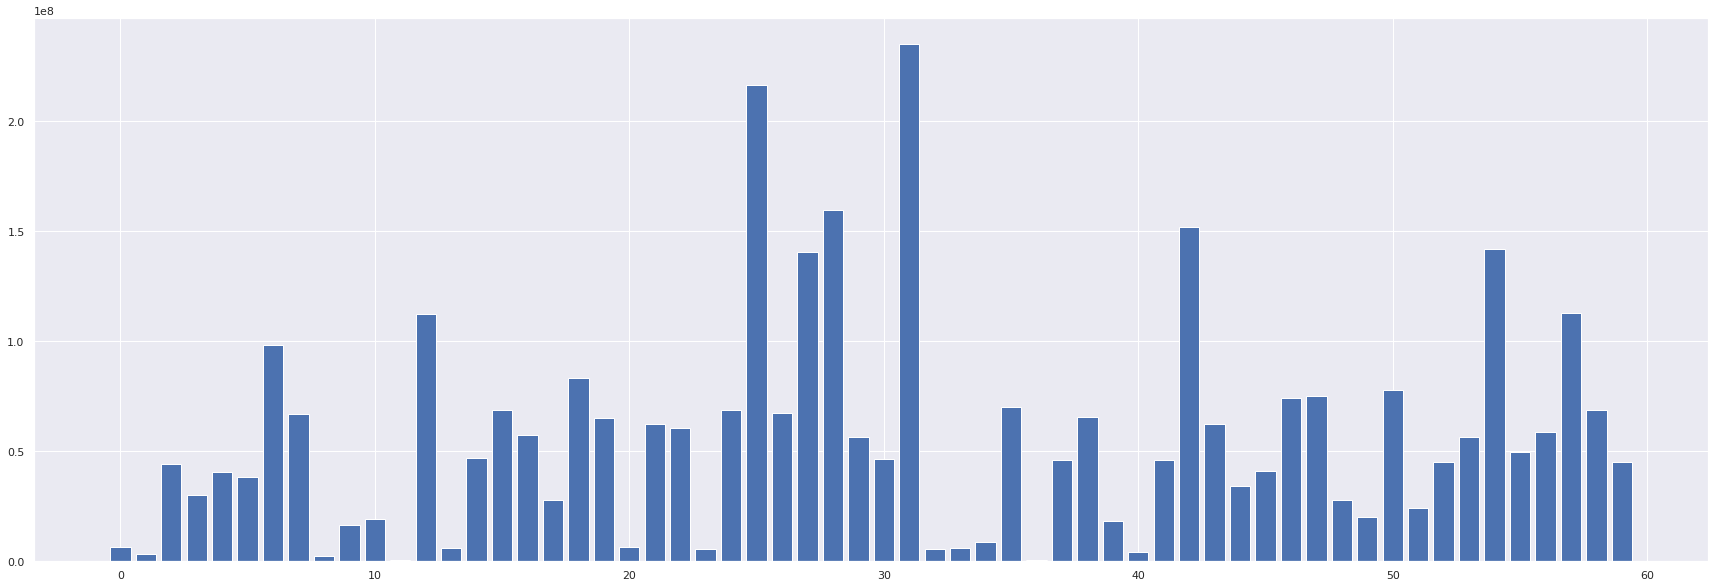

In [81]:
plt.figure(figsize=(30,10))
plt.bar(x=shop_id_net.shop_id, height=shop_id_net.net);

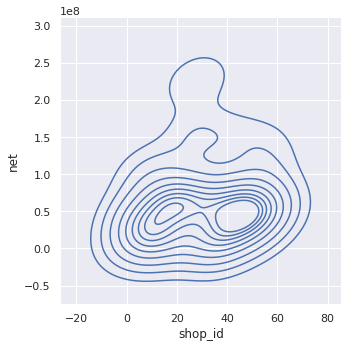

In [68]:
sns.displot(data=shop_id_net, x='shop_id', y='net', kind='kde', );

In [73]:
shop_id_net.describe()

,shop_id,net
count,60.000,60.000
mean,29.500,56648772.409
std,17.464,49802969.023
min,0.000,377714.000
25%,14.750,19958263.470
50%,29.500,46719871.450
75%,44.250,68756136.740
max,59.000,235217019.050


In [76]:
shop_id_net.net.argmax()

31

In [78]:
shop_id_net.iloc[31]

shop_id          31.000
net       235217019.050
Name: 31, dtype: float64

In [82]:
shop_31 = sales_train[sales_train.shop_id == 31]
shop_31.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,net
60143,2013-01-03,0,31,4906,1794.000,2.000,3588.000
60144,2013-01-02,0,31,4906,1789.000,1.000,1789.000
60145,2013-01-11,0,31,4890,799.000,1.000,799.000
60146,2013-01-26,0,31,4901,1499.000,1.000,1499.000
60147,2013-01-25,0,31,4901,1499.000,1.000,1499.000


In [83]:
shop_31_items = shop_31[['item_id', 'net']].groupby('item_id', as_index=False).sum()
shop_31_items.head()

,item_id,net
0,26,58.000
1,27,2499.000
2,28,2035.300
3,29,6396.000
4,30,91964.500


In [96]:
shop_31_items.describe()

,item_id,net
count,14416.000,14416.000
mean,11924.100,16316.386
std,6036.255,114229.263
min,26.000,0.000
25%,7097.750,1043.000
50%,12189.000,2990.000
75%,17054.250,9578.000
max,22167.000,11137994.900


In [97]:
shop_31_items.net.argmax()

3421

In [99]:
shop_31_items.iloc[3421]

item_id       6675.000
net       11137994.900
Name: 3421, dtype: float64